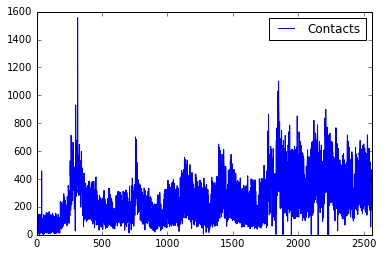

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


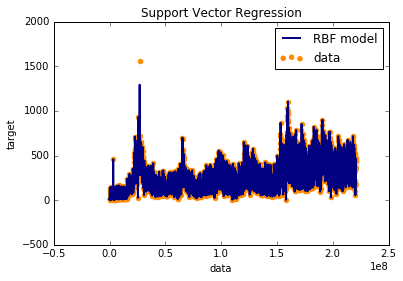

27.0931121267


['WI.pkl']

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.externals import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
FI = pd.read_csv("WI.csv")
FI.head()
import datetime
FI['START.DATE'] = FI['START.DATE'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
FI.plot()
plt.show()
FI['NEW_SECONDS'] = FI['START.DATE'].apply(lambda x: (x-datetime.datetime(2010,1,1)).total_seconds())
sum_fin = FI.groupby(['NEW_SECONDS'],as_index=False).sum()
sum_fin.to_csv("WI_Seconds.csv")
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
X =  sum_fin['NEW_SECONDS'].values
#print X
y = sum_fin['Contacts'].values

#print y
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
#y_lin = svr_lin.fit(X, y).predict(X)
#y_poly = svr_poly.fit(X, y).predict(X)
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
print mean_squared_error(y, y_rbf)
from sklearn.externals import joblib
joblib.dump(svr_rbf, 'WI.pkl') 